In [48]:
from os.path import exists as exists
import pandas as pd  
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import math 

In [49]:
RULES = [1,2]
ENLACES = [32,16,8,4,2,1]
EXPERIMENTOS = list(range(1,11))
PATH_PLOT_ENTROPY = "plot_files\\entropy\\entropy.csv"
PATH_DATA = "data_critical_threshold\\degree_distributions\\"

In [50]:
def save_csv(data_df, path_file):
    print("Save: ", path_file)
    data_df.to_csv(path_file, sep=',',encoding='utf-8')

# Obtiene datos de distribicion de grado

In [55]:
#Recibe la distribucion de grado
def shannon_entropy(p):
    H = 0
    for k in p:
        if(k > 0):
            H = H + (k*math.log(k, 2))
            #print(H)
    # Máximo valor de la entropía para normalizar
    H_max = math.log(2499,2)
    return - H / H_max

$I_2^+=4\sum_{i=0}^{n-1}(\sqrt{(p(x_i+1)}-\sqrt{p(x_i)})^2$

In [56]:
def I_2_plus(xi, p):
    s = 0
    for i in range(len(xi)-1):
        p_xi = p[i]
        p_xi1 = p[i+1]
        diff = (sqrt(p_xi1) - sqrt(p_xi))**2
        #print(p_xi)
        #print(p_xi1)
        #print(diff)
        s = s + diff
        #print("*****")
    return s/2

In [57]:
def mean_std(l):
    # Standard deviation of list 
    # Using sum() + list comprehension 
    mean = sum(l) / len(l) 
    variance = sum([((x - mean) ** 2) for x in l]) / len(l) 
    std = variance ** 0.5
    return mean, std

In [58]:
def df_results(e_dict, f_mean, f_std):
    print(e_dict)
    dic = {'enlace':e_dict, 
           'F_mean':f_mean, 
           'F_std':f_std} 
    df = pd.DataFrame(dic) 
    return df

In [67]:
def read_distributions():
    dict_entropy = dict()
    dict_entropy['enlace'] = ENLACES
    for rule in RULES:
        e = list()
        f_mean = list()
        f_std = list()
        s_mean = list()
        s_std = list()
        for enlace in ENLACES: 
            fisher = list()
            shannon = list()
            for experimento in EXPERIMENTOS:
                p_deg_dist = PATH_DATA + 'r' + str(rule) + "_enlaceD" + str(enlace) + "_experimento" + str(experimento) + "_ciclo30_dist_degree.csv"
                if exists(p_deg_dist):
                    print("Existe: ", p_deg_dist)
                    df_data = pd.read_csv(p_deg_dist,sep=";")[['bins','d']]
                    df_data['xi'] = df_data['bins']
                    df_data['p(xi)'] = df_data['d'] / 2500
                    df_data = df_data[['xi','p(xi)']]
                    xi = list(df_data['xi'])
                    p = list(df_data['p(xi)'])  
                    # Fisher
                    I2plus = I_2_plus(xi, p)
                    print("I2+ = ", I2plus)
                    fisher.append(I2plus)
                    # Shannon
                    S = shannon_entropy(p)
                    print("***** distr ")
                    print(p)
                    print(sum(p))
                    print("H = ", S)
                    shannon.append(S)
            e.append(enlace)
            #Fisher
            mean_F, std_F = mean_std(fisher)
            f_mean.append(mean_F)
            f_std.append(std_F)
            print("F_mean = ", mean_F)
            print("F_std = ", std_F)
            #Shannon
            mean_H, std_H = mean_std(shannon)
            s_mean.append(mean_H)
            s_std.append(std_H)
            print("H_mean = ", mean_H)
            print("H_std = ", std_H)
        #Fisher
        dict_entropy['F_mean_r'+ str(rule)] = f_mean
        dict_entropy['F_std_r'+ str(rule)] = f_std 
        #Shannon
        dict_entropy['H_mean_r'+ str(rule)] = s_mean
        dict_entropy['H_std_r'+ str(rule)] = s_std 
    #Shannon de 50x50 grif graph
    p = [x/2500 for x in [4, 192, 2304]]
    print(p)
    H_init = shannon_entropy(p)
    print("H_50x50_grid = ", H_init)
    df_entropy = pd.DataFrame(dict_entropy)
    return df_entropy

In [68]:
-1*((0.0016 * math.log(0.0016,2)) + (0.0768 * math.log(0.0768,2)) + (0.9216 * math.log(0.9216,2))) / math.log(2499,2)

0.03612824436332547

In [69]:
pd_results = read_distributions()

Existe:  data_critical_threshold\degree_distributions\r1_enlaceD32_experimento1_ciclo30_dist_degree.csv
I2+ =  0.06326086822137184
***** distr 
[0.0, 0.0, 0.0, 0.0016, 0.0324, 0.0684, 0.2424, 0.4132, 0.242]
1.0
H =  0.17344408122398422
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD32_experimento2_ciclo30_dist_degree.csv
I2+ =  0.06137694201036757
***** distr 
[0.0, 0.0, 0.0, 0.0012, 0.0332, 0.064, 0.2464, 0.4012, 0.254]
1.0
H =  0.17341135297869453
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD32_experimento3_ciclo30_dist_degree.csv
I2+ =  0.05691628418186001
***** distr 
[0.0, 0.0, 0.0, 0.0008, 0.0328, 0.0668, 0.2488, 0.3852, 0.2656]
1.0
H =  0.17437717900245697
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD32_experimento4_ciclo30_dist_degree.csv
I2+ =  0.05864914770555218
***** distr 
[0.0, 0.0, 0.0, 0.0016, 0.0356, 0.0692, 0.246, 0.3956, 0.252]
1.0
H =  0.17550026790063866
Existe:  data_critical_threshold\degree_distributions\r1_

Existe:  data_critical_threshold\degree_distributions\r1_enlaceD4_experimento8_ciclo30_dist_degree.csv
I2+ =  0.15857246291532565
***** distr 
[0.0, 0.0, 0.0, 0.0, 0.0016, 0.0628, 0.4448, 0.1644, 0.0752, 0.054, 0.04, 0.032, 0.0348, 0.0196, 0.0204, 0.0112, 0.0068, 0.0076, 0.0036, 0.0028, 0.0024, 0.0028, 0.0016, 0.0036, 0.0008, 0.0012, 0.0004, 0.0008, 0.0008, 0.0008, 0.0008, 0.0004, 0.0004, 0.0008, 0.0, 0.0, 0.0, 0.0004, 0.0, 0.0, 0.0, 0.0004]
1.0000000000000002
H =  0.2534885666226722
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD4_experimento9_ciclo30_dist_degree.csv
I2+ =  0.1586453152849157
***** distr 
[0.0, 0.0, 0.0, 0.0, 0.0016, 0.0612, 0.4456, 0.164, 0.0876, 0.0528, 0.0432, 0.026, 0.0232, 0.0148, 0.0152, 0.016, 0.008, 0.0108, 0.0076, 0.004, 0.0032, 0.0032, 0.0024, 0.0016, 0.002, 0.0004, 0.0004, 0.0016, 0.0008, 0.0004, 0.0012, 0.0, 0.0, 0.0, 0.0008, 0.0, 0.0004]
1.0
H =  0.25303035328386775
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD4_experim

Existe:  data_critical_threshold\degree_distributions\r1_enlaceD1_experimento7_ciclo30_dist_degree.csv
I2+ =  0.22070575789654803
***** distr 
[0.0, 0.0, 0.0, 0.0, 0.0016, 0.0628, 0.532, 0.1288, 0.066, 0.0472, 0.0316, 0.0244, 0.0176, 0.0112, 0.0116, 0.01, 0.0052, 0.0052, 0.0052, 0.0048, 0.0056, 0.0028, 0.002, 0.0024, 0.004, 0.0004, 0.0016, 0.0036, 0.0028, 0.0004, 0.0008, 0.0024, 0.0, 0.0, 0.0008, 0.0008, 0.0004, 0.0004, 0.0008, 0.0008, 0.0, 0.0, 0.0008, 0.0, 0.0, 0.0, 0.0004, 0.0, 0.0, 0.0, 0.0, 0.0004, 0.0, 0.0, 0.0004]
1.0
H =  0.23596039999745552
Existe:  data_critical_threshold\degree_distributions\r1_enlaceD1_experimento8_ciclo30_dist_degree.csv
I2+ =  0.20972460296855297
***** distr 
[0.0, 0.0, 0.0, 0.0, 0.0016, 0.0632, 0.5236, 0.1412, 0.066, 0.0364, 0.0288, 0.0276, 0.018, 0.0176, 0.0136, 0.0112, 0.006, 0.006, 0.004, 0.0024, 0.0036, 0.0028, 0.002, 0.0032, 0.0028, 0.002, 0.002, 0.0012, 0.0028, 0.002, 0.0016, 0.0004, 0.0012, 0.0004, 0.0004, 0.0012, 0.0, 0.0004, 0.0004, 0.0, 0.0004,

Existe:  data_critical_threshold\degree_distributions\r2_enlaceD4_experimento9_ciclo30_dist_degree.csv
I2+ =  0.102443367789785
***** distr 
[0.0, 0.0, 0.0, 0.0, 0.0016, 0.0476, 0.332, 0.2092, 0.14, 0.0824, 0.0556, 0.038, 0.0232, 0.0228, 0.0136, 0.0084, 0.0072, 0.0064, 0.002, 0.0032, 0.0016, 0.0004, 0.0004, 0.0012, 0.0, 0.0008, 0.0, 0.0, 0.0008, 0.0004, 0.0004, 0.0004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004]
0.9999999999999998
H =  0.2599557906031352
Existe:  data_critical_threshold\degree_distributions\r2_enlaceD4_experimento10_ciclo30_dist_degree.csv
I2+ =  0.0954518598239436
***** distr 
[0.0, 0.0, 0.0, 0.0, 0.0012, 0.0536, 0.3156, 0.2236, 0.1296, 0.0928, 0.058, 0.0348, 0.0264, 0.0156, 0.0148, 0.0088, 0.0068, 0.0044, 0.0052, 0.0024, 0.0012, 0.0012, 0.0, 0.0008, 0.0, 0.0004, 0.0004, 0.0, 0.0004, 0.0, 0.0, 0.0004, 0.0, 0.0004, 0.0004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004, 0.0, 0.0, 0.0, 0.0004]
0.9999999999999996
H =  0.26108414393739016
F_mean =  0.09830622300940545
F_std =  

Plots files para calcular metricas

Fisher and Shannon entropy
   enlace  F_mean_r1  F_std_r1  H_mean_r1  H_std_r1  F_mean_r2  F_std_r2  \
0      32   0.059415  0.002792   0.173705  0.001073   0.122946  0.002943   
1      16   0.064803  0.001746   0.233165  0.000991   0.058123  0.001315   
2       8   0.068296  0.001801   0.261142  0.000453   0.079952  0.001910   
3       4   0.158556  0.003692   0.253265  0.000696   0.098306  0.003918   
4       2   0.223158  0.007975   0.235034  0.001790   0.073178  0.007224   
5       1   0.221378  0.008729   0.235444  0.002003   0.069199  0.002595   

   H_mean_r2  H_std_r2  
0   0.180403  0.001504  
1   0.247532  0.000650  
2   0.261229  0.000477  
3   0.261340  0.000993  
4   0.256660  0.003296  
5   0.253834  0.000889  


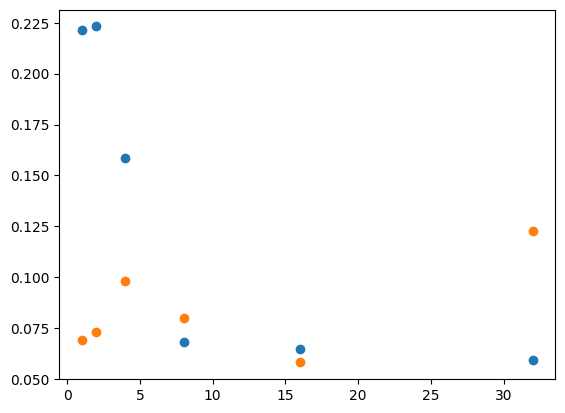

In [70]:
print("Fisher and Shannon entropy")
print(pd_results)
PATH_PLOT_ENTROPY = "plot_files\\entropy\\entropy.csv"
pd_results.to_csv(PATH_PLOT_ENTROPY, sep=',',encoding='utf-8')
plt.scatter(pd_results['enlace'], pd_results["F_mean_r1"]) 
plt.scatter(pd_results['enlace'], pd_results["F_mean_r2"])
plt.show()

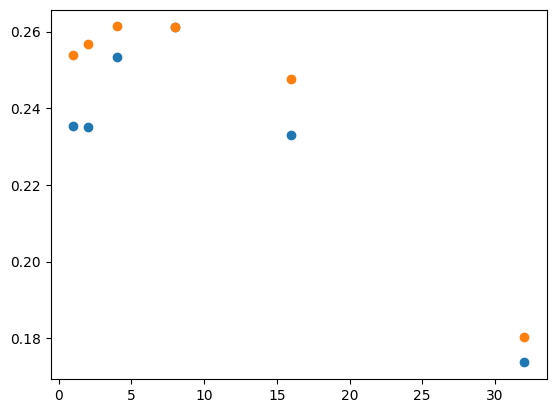

In [71]:
plt.scatter(pd_results['enlace'], pd_results["H_mean_r1"]) 
plt.scatter(pd_results['enlace'], pd_results["H_mean_r2"])
plt.show()